<a href="https://www.kaggle.com/code/averma111/pytorch-advanced-regression?scriptVersionId=127749600" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import torch 
import warnings
warnings.filterwarnings('ignore')


In [2]:
house_df = pd.read_csv('/kaggle/input/house-price/1553768847-housing.csv')
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


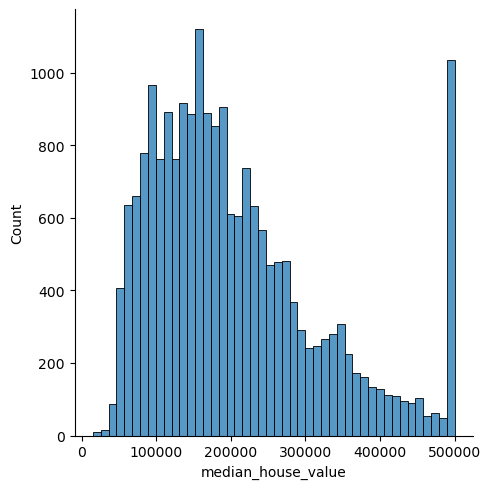

In [3]:
sns.displot(x = house_df['median_house_value'], data=house_df)

In [4]:
def summary(text, df):
    print(f'{text} shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summ['null'] = df.isnull().sum()
    summ['unique'] = df.nunique()
    summ['min'] = df.min()
    summ['median'] = df.median()
    summ['max'] = df.max()
    summ['mean'] = df.mean()
    summ['std'] = df.std()
    return summ

In [5]:
summary('house_dataframe',house_df)

house_dataframe shape: (20640, 10)


,dtypes,null,unique,min,median,max,mean,std
longitude,float64,0,844,-124.35,-118.4900,-114.31,-119.569704,2.003532
latitude,float64,0,862,32.54,34.2600,41.95,35.631861,2.135952
housing_median_age,int64,0,52,1,29.0000,52,28.639486,12.585558
total_rooms,int64,0,5926,2,2127.0000,39320,2635.763081,2181.615252
total_bedrooms,float64,207,1923,1.0,435.0000,6445.0,537.870553,421.385070
population,int64,0,3888,3,1166.0000,35682,1425.476744,1132.462122
households,int64,0,1815,1,409.0000,6082,499.539680,382.329753
median_income,float64,0,12928,0.4999,3.5348,15.0001,3.870671,1.899822
ocean_proximity,object,0,5,<1H OCEAN,NaN,NEAR OCEAN,NaN,NaN
median_house_value,int64,0,3842,14999,179700.0000,500001,206855.816909,115395.615874


In [6]:
# Since there are 207 nulls for total bedroom we need to replace them with mean
house_df.fillna(house_df['total_bedrooms'].mean(),inplace=True)

In [7]:
summary('house_dataframe',house_df)

house_dataframe shape: (20640, 10)


,dtypes,null,unique,min,median,max,mean,std
longitude,float64,0,844,-124.35,-118.4900,-114.31,-119.569704,2.003532
latitude,float64,0,862,32.54,34.2600,41.95,35.631861,2.135952
housing_median_age,int64,0,52,1,29.0000,52,28.639486,12.585558
total_rooms,int64,0,5926,2,2127.0000,39320,2635.763081,2181.615252
total_bedrooms,float64,0,1924,1.0,438.0000,6445.0,537.870553,419.266592
population,int64,0,3888,3,1166.0000,35682,1425.476744,1132.462122
households,int64,0,1815,1,409.0000,6082,499.539680,382.329753
median_income,float64,0,12928,0.4999,3.5348,15.0001,3.870671,1.899822
ocean_proximity,object,0,5,<1H OCEAN,NaN,NEAR OCEAN,NaN,NaN
median_house_value,int64,0,3842,14999,179700.0000,500001,206855.816909,115395.615874


In [8]:
# ocean_proximity is the categorical field in dataset
house_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:xlabel='ocean_proximity', ylabel='Count'>

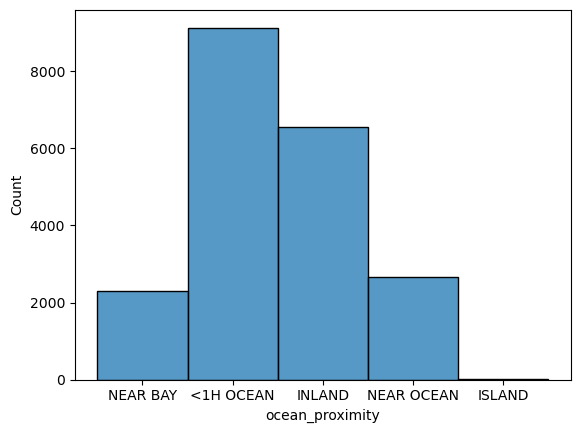

In [9]:
sns.histplot(x=house_df['ocean_proximity'],data=house_df)

In [10]:
## Convert categorical data into numerical data so that our model can understand it
house_new = pd.get_dummies(house_df, prefix=['ocean_proximity'])
house_new.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


In [11]:
y = house_new['median_house_value']
X = house_new.drop('median_house_value',axis=1)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16512, 13), (4128, 13), (16512,), (4128,))

In [13]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

In [14]:
from torch.utils.data import Dataset, DataLoader
class CSVDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


In [15]:
train_dataset = CSVDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
test_dataset = CSVDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())

In [16]:
EPOCHS = 100
BATCH_SIZE = 32
LEARNING_RATE = 0.001
NUM_FEATURES = len(X.columns)

In [17]:
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [18]:
class MultiFeatureRegression(torch.nn.Module):
    def __init__(self, num_features):
        super(MultiFeatureRegression, self).__init__()
        
        self.layer_1 = torch.nn.Linear(num_features, 32)
        self.layer_2 = torch.nn.Linear(32, 64)
        self.layer_3 = torch.nn.Linear(64, 32)
        self.layer_out = torch.nn.Linear(32, 1)
        
        self.relu = torch.nn.ReLU()
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_out(x)
        return (x)
    def predict(self, test_inputs):
        x = self.relu(self.layer_1(test_inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_out(x)
        return (x)

In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [20]:
model = MultiFeatureRegression(NUM_FEATURES)
model.to(device)
print(model)

MultiFeatureRegression(
  (layer_1): Linear(in_features=13, out_features=32, bias=True)
  (layer_2): Linear(in_features=32, out_features=64, bias=True)
  (layer_3): Linear(in_features=64, out_features=32, bias=True)
  (layer_out): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)


In [21]:
criterion = torch.nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [22]:
loss_stats = {
    'train': [],
    "test": []
}

In [23]:
from tqdm.notebook import tqdm
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    # TRAINING
    train_epoch_loss = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        y_train_pred = model(X_train_batch)
        train_loss = criterion(y_train_pred, y_train_batch.unsqueeze(1))
        train_loss.backward()
        optimizer.step()
        train_epoch_loss += train_loss.item()
             
    # TESTING    
    with torch.no_grad():
        test_epoch_loss = 0
        model.eval()
        for X_test_batch, y_test_batch in test_loader:
            X_test_batch, y_test_batch = X_test_batch.to(device), y_test_batch.to(device)
            y_test_pred = model(X_test_batch)
            val_loss = criterion(y_test_pred, y_test_batch.unsqueeze(1))
            test_epoch_loss += val_loss.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['test'].append(test_epoch_loss/len(test_loader))                              
    
    if EPOCHS%10==0:
        print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Test Loss: {test_epoch_loss/len(test_loader):.5f}')

Begin training.


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 177749.55296 | Test Loss: 89380.52979
Epoch 002: | Train Loss: 79851.38883 | Test Loss: 74119.47784
Epoch 003: | Train Loss: 72444.96953 | Test Loss: 68812.74257
Epoch 004: | Train Loss: 68337.71893 | Test Loss: 65542.87597
Epoch 005: | Train Loss: 65552.17758 | Test Loss: 63124.05881
Epoch 006: | Train Loss: 63066.64583 | Test Loss: 60702.77304
Epoch 007: | Train Loss: 60528.04236 | Test Loss: 58193.79586
Epoch 008: | Train Loss: 57980.18432 | Test Loss: 55839.29803
Epoch 009: | Train Loss: 55596.63895 | Test Loss: 54108.85541
Epoch 010: | Train Loss: 53806.07366 | Test Loss: 52628.67706
Epoch 011: | Train Loss: 52603.90801 | Test Loss: 51832.23361
Epoch 012: | Train Loss: 51808.52742 | Test Loss: 51376.86125
Epoch 013: | Train Loss: 51271.49452 | Test Loss: 51073.05275
Epoch 014: | Train Loss: 50907.99347 | Test Loss: 50967.51988
Epoch 015: | Train Loss: 50637.44755 | Test Loss: 50671.79265
Epoch 016: | Train Loss: 50431.77776 | Test Loss: 50664.66483
Epoch 0

Text(0.5, 1.0, 'Train-Test Loss/Epoch')

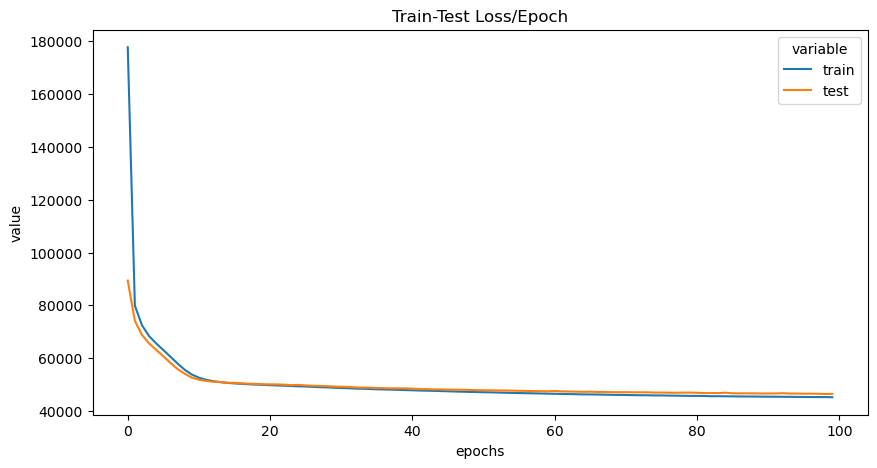

In [25]:
train_test_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
plt.figure(figsize=(10,5))
sns.lineplot(data=train_test_loss_df, x = "epochs", y="value", hue="variable").set_title('Train-Test Loss/Epoch')

In [30]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_pred_list.append(y_test_pred.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [32]:
from sklearn.metrics import mean_absolute_error,r2_score
mae = mean_absolute_error(y_test, y_pred_list)
r_square = r2_score(y_test, y_pred_list)
print("Mean Absolute Error :",mae)
print("R^2 :",r_square)

Mean Absolute Error : 46477.70286607373
R^2 : 0.6288191907972032
